# Perkenalan 

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Pada notebook ini akan dilakukan proses analisis mengenai penjualan di US Store antara tahun 2010 dan 2011. 

Identifikasi Masalah
- Problem statement : 

- A. Spesifik
Mengetahui penjualan produk di US Stores dalam kurun waktu tahun 2010-2011. 
Penjabaran masalah dengan metode 5W+1H :
1. Berapakah persentase penjualan produk di Market Size Major dan Market Size Small ? 
2. Dimarket manakah yang mendapatkan keuntungan penjualannya paling tinggi ?
3. Dimanakah penjualan produk yang paling rendah pendapatannya ?
4. Produk apakah yang total pendapatannya paling tinggi di tahun 2010 ?
5. Produk apakah yang total pendapatannya paling tinggi di tahun 2011 ?
6. Jenis produk apakah yang mempunyai pengeluaran tinggi di tahun 2010 ? 
7. Jenis produk apakah yang mempunyai pengeluaran tinggi di tahun 2011 ? 

- B. Measurable (terukur) : dari melihat jumlah transaksi yang meningkat, jumlah pelanggan baru bertambah dan bisa menjadi pelanggan tetap, total pendapatan meningkat, produk banyak sold out/ jumlah produk yang terjual mengalami kenaikan.

- C. Achievable (bisa dicapai) : melihat faktor-faktor penting yang mempengaruhi penjualan (seperti harga produk, promosi atau potongan harga, dll) dievaluasi setiap bulannya untuk jangka pendek dan jangka panjang dievaluasi setiap tahunnya. Sehingga bisa mengambil keputusan yang tepat.

- D. Relevant (relevan) : meningkatkan penjualan penting untuk dilakukan agar US Store penjualannya tetap meningkat

- E. Time-bound (terkait waktu) : dilakukan evaluasi di setiap bulan dan tahunnya agar dapat diukur dengan efektif untuk memastikan keberhasilan dari apa yang sudah kita kerjakan di setiap bulan atau tahunnya.

Latar Belakang
- Us Store merupakan toko yang bergerak di bidang penjualan. Produk yang dijual di Us Store adalah aneka produk kopi, dan teh. Saat ini bisnis kopi adalah bisnis yang cukup menggiurkan. Karena dimasa ini kopi bukan lagi kebiasaan untuk menghilangkan kantuk, tapi sudah menjadi life style. Bidan usaha perdagangan tentunya tidak akan lepas dari persaingan. Oleh karena itu pada notebook ini akan dilakukan analisis mengenai penjualan produk di Us Store dari data pembukuan bulanan tahun 2010-2011 yang nantinya akan dipakai acuan untuk mengembangkan bisnis kedepannya. 

# URL Dashboard
- [Dataset](https://www.kaggle.com/datasets/dsfelix/us-stores-sales)
- [Looker Studio](https://lookerstudio.google.com/reporting/091ff24d-de36-4fc3-89eb-b63b03cbb2f6)

# Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('./sales.csv')

In [3]:
# Menampilkan 5 data teratas
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [4]:
# Menampilkan 5 data terbawah
df.tail()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular
4247,985,Louisiana,South,Small Market,4.0,90.0,153.0,64.0,81.0,58.0,-113.0,10.0,50.0,80.0,130.0,4,05/01/11 00:00:00,Espresso,Caffe Latte,Regular


In [5]:
# Menampilkan jumlah kolom dan baris
df.shape

(4248, 20)

In [6]:
# Menampilkan deskripsi df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,4248.0,582.278013,221.140310,203.0,417.00,573.0,772.0,985.0
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0


# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [8]:
# Mencari missing values
df.isnull()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().any(axis = 0)

Area Code         False
State             False
Market            False
Market Size       False
Profit            False
Margin            False
Sales             False
COGS              False
Total Expenses    False
Marketing         False
Inventory         False
Budget Profit     False
Budget COGS       False
Budget Margin     False
Budget Sales      False
ProductId         False
Date              False
Product Type      False
Product           False
Type              False
dtype: bool

In [10]:
# Mencari missing value non standard
nul = {}
for m in list(df.columns):
  nul[m] = 0
  for n in df[m]:
    if n in ["NaN ", "NaN", "n/a", "na", "--", "none", "?", "-"]:
      nul[m] = nul[m] + 1

nul

{'Area Code': 0,
 'State': 0,
 'Market': 0,
 'Market Size': 0,
 'Profit': 0,
 'Margin': 0,
 'Sales': 0,
 'COGS': 0,
 'Total Expenses': 0,
 'Marketing': 0,
 'Inventory': 0,
 'Budget Profit': 0,
 'Budget COGS': 0,
 'Budget Margin': 0,
 'Budget Sales': 0,
 'ProductId': 0,
 'Date': 0,
 'Product Type': 0,
 'Product': 0,
 'Type': 0}

- Setelah dilakukan pengecekan data untuk missing values (standard maupun non standard) tidak terdapat adanya missing value pada data

# Data Preprocessing

In [11]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [12]:
df['year'] = df['Date']

In [13]:
df['year'] = pd.to_datetime(df['year']).dt.year

In [14]:
df[(df['Market Size']== 'Small Market') &           # Mencari data Market Size Small        
    (df['year']== 2010)].head()                     # Hanya tahun 2010

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type,year
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,2010
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,2010
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,130.0,110.0,180.0,290.0,2,2010-11-01,Coffee,Columbian,Regular,2010
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,110.0,100.0,160.0,260.0,2,2010-12-01,Coffee,Columbian,Regular,2010
9,203,Connecticut,East,Small Market,15.0,31.0,51.0,20.0,16.0,5.0,...,20.0,20.0,30.0,50.0,13,2010-06-01,Tea,Green Tea,Regular,2010


In [15]:
df[(df['Market Size']== 'Small Market') &           # Mencari data Market Size Small          
    (df['year']== 2011) & (df['Date'])].head()       # Hanya tahun 2011

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type,year
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,90.0,80.0,130.0,210.0,2,2011-07-01,Coffee,Columbian,Regular,2011
5,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,90.0,80.0,130.0,210.0,2,2011-08-01,Coffee,Columbian,Regular,2011
6,203,Connecticut,East,Small Market,135.0,155.0,275.0,103.0,64.0,33.0,...,110.0,90.0,150.0,240.0,2,2011-09-01,Coffee,Columbian,Regular,2011
7,203,Connecticut,East,Small Market,171.0,188.0,334.0,125.0,73.0,41.0,...,130.0,100.0,160.0,260.0,2,2011-10-01,Coffee,Columbian,Regular,2011
8,203,Connecticut,East,Small Market,181.0,195.0,346.0,130.0,73.0,42.0,...,130.0,110.0,180.0,290.0,2,2011-11-01,Coffee,Columbian,Regular,2011


In [16]:
# Membuat variabel baru dengan data Market Small
small_type = df[(df["Market Size"] == "Small Market")]

-1.7230494289902205


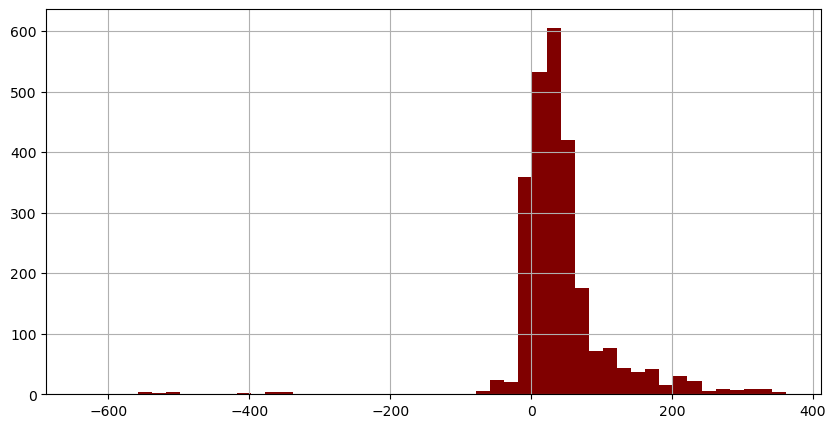

In [17]:
# Mencari nilai skew dari profit small type
print(small_type['Profit'].skew())
small_type['Profit'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

- Berdasarkan gambar dapat dilihat babhwa nilai skew pada profit small type yaitu -1.72. Hal tersebut menandakan bahwa distribusi data tidak normal

Market Size
Small Market    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Profit, dtype: object

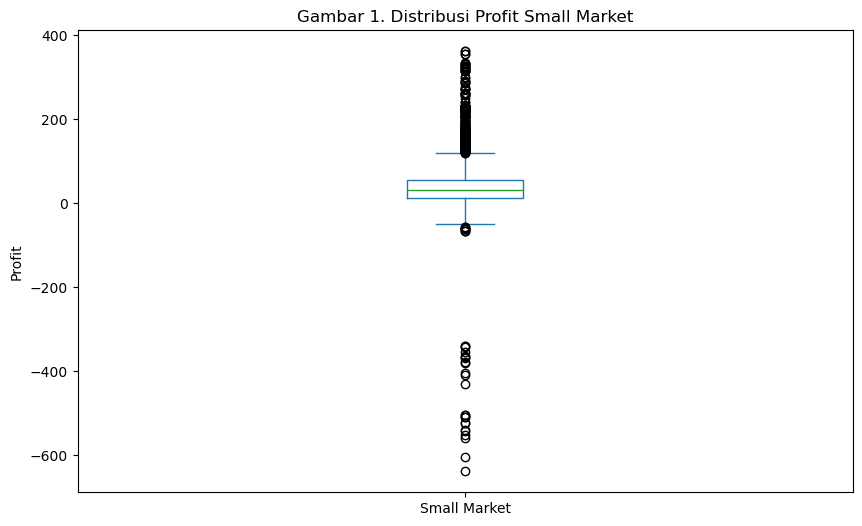

In [18]:
small_type.groupby(["Market Size"])["Profit"].plot(kind='box', title='Gambar 1. Distribusi Profit Small Market', xlabel = '', ylabel = 'Profit', figsize = (10,6))

- Berdasarkan gambar di atas dapat dilihat bahwa terdapat outliers pada data Profit Small Market menandakan distribusi data tidak normal

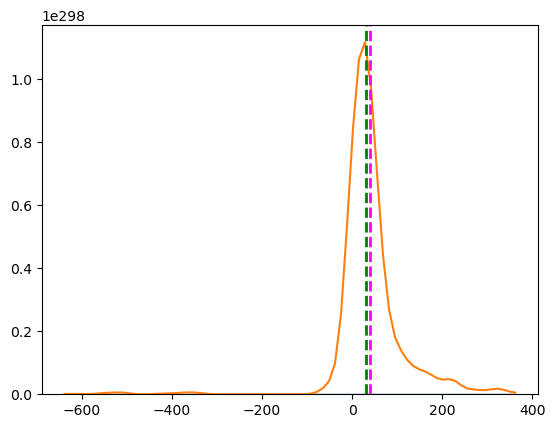

In [19]:
# Histogram profil pada small market
p = small_type['Profit']
density = stats.gaussian_kde(p)
n, x, _ = plt.hist(p, histtype='step', bins=75)  
plt.plot(x, density(x)*1000**100)
plt.axvline(p.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(p.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

- Berdasarkan gambar di atas nilai profit pada small market memiliki nilai skew -1.72. Maka untuk melihat outliers dari distribusi data yang tidak normal menghitungnya menggunakan Tukey's Rule

In [20]:
# Mencari nilai Q1, Median dan Q3 dengan percentile
q1, med, q3 = np.percentile(small_type['Profit'], [25, 50, 75])
print (q1, med, q3)

# Menghitung nilai IQR
iqr = q3 - q1
iqr

12.0 31.0 55.0


43.0

In [21]:
# Menghitung Upper bound
upper = q3 + (3 * iqr)
print("Upper boundary:",upper)

Upper boundary: 184.0


In [22]:
# Menghitung Lower bound
lower = q1 - (3 * iqr)
print("Lower boundary:",lower)

Lower boundary: -117.0


Berdasarkan data di atas terlihat bahwa :
- Distribusi data profit pada small type adalah terdistribusi tidak normal, maka menggunakan metode Tukey's rule untuk mendeteksi outliers (IQR) 
- Nilai IQR = 43.0
- Nilai Upper boundary (Q3) = 184.0
- Nilai Lower boundary (Q1) = -117.0

# Data Eksplorasi

1. Berapakah persentase penjualan produk di Market Size Major dan Market Size Small ? 

In [23]:
df.groupby('Market Size')[['Sales']].sum()

,Sales
Market Size,
Major Market,425141.0
Small Market,394670.0


array([<AxesSubplot: >], dtype=object)

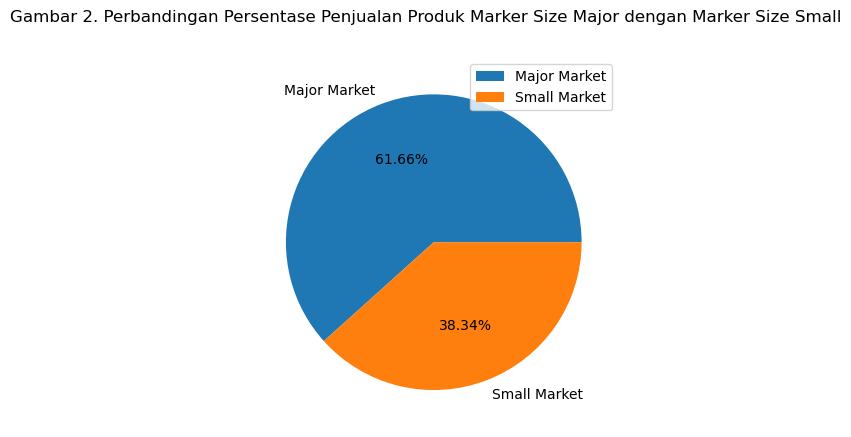

In [24]:
df.groupby('Market Size')[['Sales']].mean().sort_values(by='Sales', ascending=False).plot(kind = 'pie', autopct='%.2f%%', subplots = True, title='Gambar 2. Perbandingan Persentase Penjualan Produk Marker Size Major dengan Marker Size Small', xlabel = '', ylabel = '')

Berdasarkan diagram diatas, dapat dilihat bahwa :
- Persentase total penjualan di Market Size Major memiliki nilai persentase lebih tinggi dibandingkan dengan Market Size Small yaitu sebesar 61.66 % dengan total Penjualan yaitu sebesar 425.141. 

2. Dimarket manakah yang mendapatkan keuntungan penjualannya paling tinggi ?

In [25]:
df.groupby('Market')[['Profit']].sum()

,Profit
Market,
Central,93852.0
East,59217.0
South,32478.0
West,73996.0


array([<AxesSubplot: >], dtype=object)

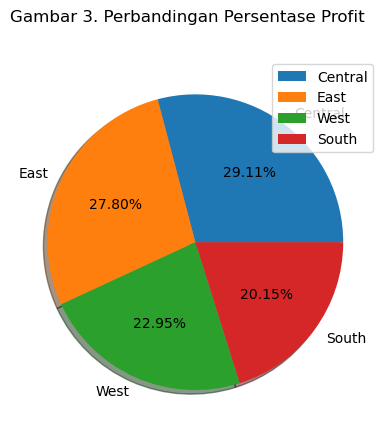

In [26]:
df.groupby('Market')[['Profit']].mean().sort_values(by='Profit', ascending=False).plot(kind = 'pie', autopct='%.2f%%', shadow = True, subplots = True, title='Gambar 3. Perbandingan Persentase Profit', xlabel = '', ylabel = '')

- Berdasarkan diagram diatas, dapat disimpulkan bahwa market central merupakan market dengan nilai profit tertinggi

3. Dimanakah wilayah penjualan produk yang paling rendah pendapatannya ?

In [27]:
df.groupby('State')[['Sales']].mean().sort_values(by='Sales', ascending=False)

,Sales
State,
New York,369.020833
California,336.430556
Illinois,323.532407
Iowa,253.472222
Nevada,227.875000
Texas,222.678571
Massachusetts,208.090278
Colorado,182.496212
Florida,173.347222


<AxesSubplot: title={'center': 'Gambar 4. Wilayah penjualan produk terendah'}, xlabel='State', ylabel='Sales'>

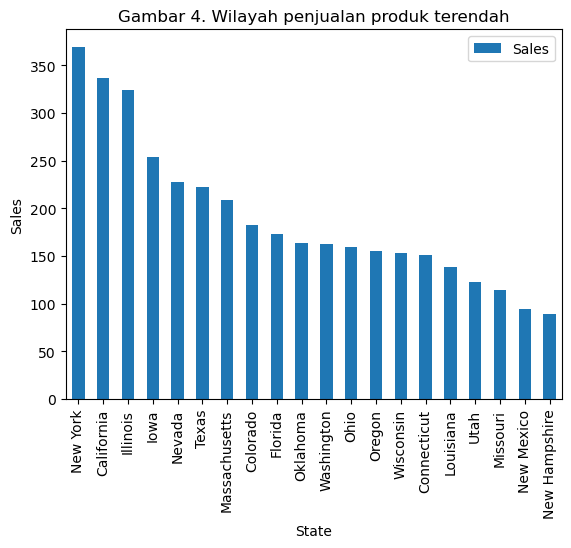

In [28]:
df.groupby('State')[['Sales']].mean().sort_values(by='Sales', ascending=False).plot(kind = 'bar', title='Gambar 4. Wilayah penjualan produk terendah', xlabel = 'State', ylabel = 'Sales')

- Berdasarkan diagram diatas, dapat disimpulkan bahwa New Hampshire merupakan state dengan penjualan terendah

4. Produk apakah yang total pendapatannya paling tinggi di tahun 2010 ?

In [29]:
df[df['year'] == 2010].groupby('Product')[['Profit']].sum().sort_values(by='Profit', ascending=False)

,Profit
Product,
Columbian,22777.0
Lemon,12195.0
Decaf Espresso,12025.0
Darjeeling,11844.0
Chamomile,11093.0
Earl Grey,9851.0
Caffe Mocha,7201.0
Decaf Irish Cream,5708.0
Caffe Latte,4636.0


<AxesSubplot: title={'center': 'Gambar 5. Produk dengan pendapatan tertinggi di tahun 2010'}, xlabel='Product', ylabel='Profit'>

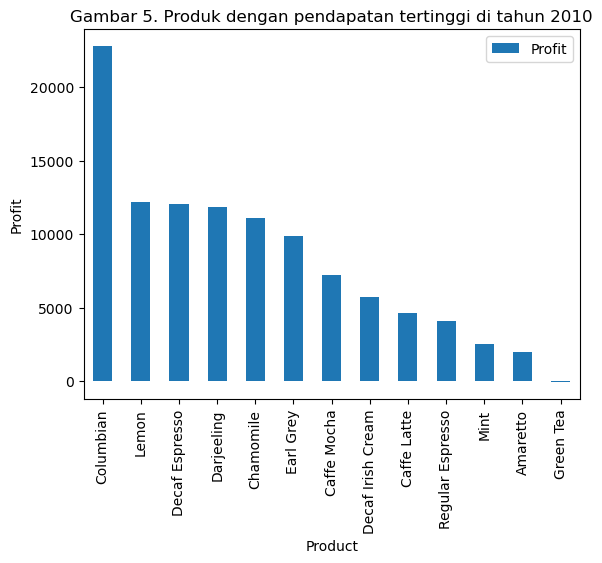

In [30]:
df[df['year'] == 2010].groupby('Product')[['Profit']].sum().sort_values(by='Profit', ascending=False).plot(kind='bar', title='Gambar 5. Produk dengan pendapatan tertinggi di tahun 2010', xlabel = 'Product', ylabel = 'Profit')

- Berdasarkan diagram diatas, dapat disimpulkan bahwa produk Columbian merupakan produk dengan total pendapatannya paling tinggi di tahun 2010 

5. Produk apakah yang total pendapatannya paling tinggi di tahun 2011 ?

In [31]:
df[df['year'] == 2011].groupby('Product')[['Profit']].mean().sort_values(by='Profit', ascending=False)

,Profit
Product,
Regular Espresso,165.916667
Columbian,137.612500
Earl Grey,99.395833
Darjeeling,89.630208
Decaf Espresso,85.671569
Chamomile,84.052083
Lemon,73.641667
Caffe Latte,62.398148
Caffe Mocha,43.654167


<AxesSubplot: title={'center': 'Gambar 6. Produk dengan pendapatan paling tinggi di tahun 2011'}, xlabel='Product', ylabel='Profit'>

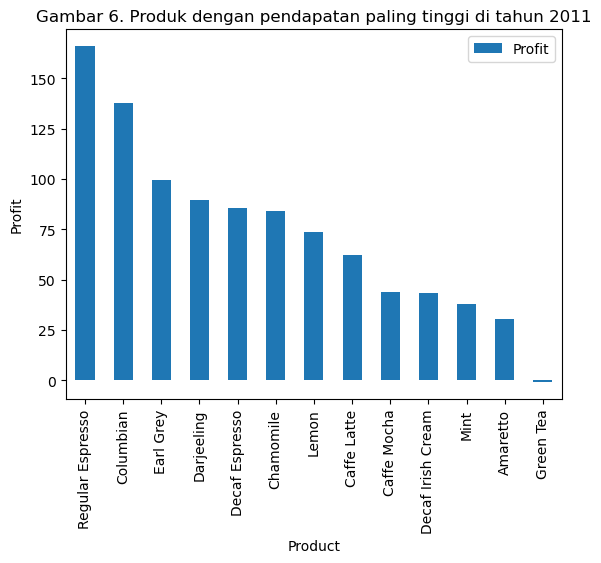

In [32]:
df[df['year'] == 2011].groupby('Product')[['Profit']].mean().sort_values(by='Profit', ascending=False).plot(kind='bar', title='Gambar 6. Produk dengan pendapatan paling tinggi di tahun 2011', xlabel = 'Product', ylabel = 'Profit')

- Berdasarkan diagram diatas, dapat disimpulkan bahwa produk Columbian merupakan produk dengan total pendapatannya paling tinggi di tahun 2011

6. Jenis produk apakah yang pengeluarannya paling tinggi di tahun 2010 ? 

In [33]:
df[df['year'] == 2010].groupby('Product')[['Total Expenses']].mean().sort_values(by='Total Expenses', ascending=False)

,Total Expenses
Product,
Regular Espresso,68.305556
Columbian,66.037500
Caffe Mocha,63.920833
Earl Grey,59.319444
Lemon,58.391667
Chamomile,53.036458
Mint,52.125000
Decaf Irish Cream,51.963542
Caffe Latte,48.851852


<AxesSubplot: title={'center': 'Gambar 7. Produk dengan pengeluaran paling tinggi di tahun 2010'}, xlabel='Product', ylabel='Total Expenses'>

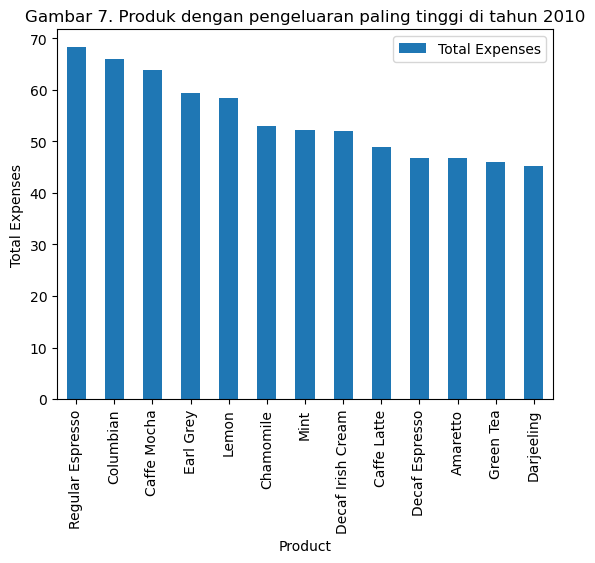

In [34]:
df[df['year'] == 2010].groupby('Product')[['Total Expenses']].mean().sort_values(by='Total Expenses', ascending=False).plot(kind='bar', title='Gambar 7. Produk dengan pengeluaran paling tinggi di tahun 2010', xlabel = 'Product', ylabel = 'Total Expenses')

- Berdasarkan diagram diatas, dapat disimpulkan bahwa Regular Espresso merupakan jenis produk dengan pegeluaran paling tinggi di tahun 2010

7. Jenis produk apakah yang mempunyai pengeluaran tinggi di tahun 2011 ? 

In [35]:
df[df['year'] == 2011].groupby('Product')[['Total Expenses']].sum().sort_values(by='Total Expenses', ascending=False)

,Total Expenses
Product,
Columbian,15524.0
Caffe Mocha,15026.0
Lemon,13732.0
Chamomile,9981.0
Decaf Irish Cream,9778.0
Decaf Espresso,9362.0
Darjeeling,8509.0
Earl Grey,8374.0
Green Tea,6491.0


<AxesSubplot: title={'center': 'Gambar 2. Produk dengan pengeluaran paling tinggi di tahun 2011'}, xlabel='Product', ylabel='Total Expenses'>

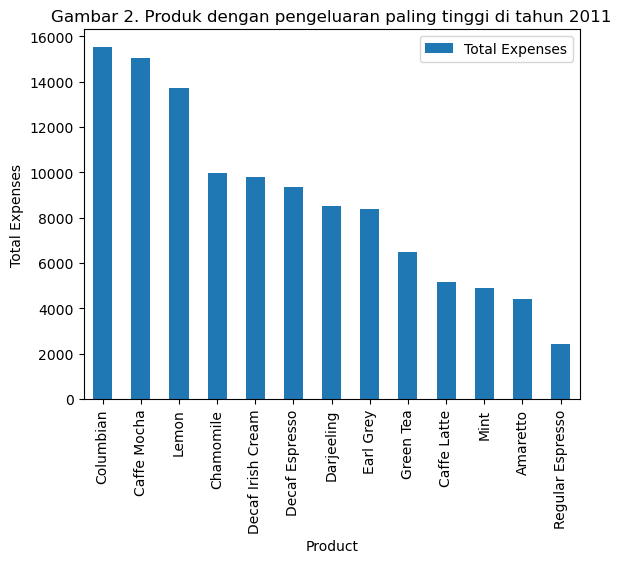

In [36]:
df[df['year'] == 2011].groupby('Product')[['Total Expenses']].sum().sort_values(by='Total Expenses', ascending=False).plot(kind = 'bar', title='Gambar 2. Produk dengan pengeluaran paling tinggi di tahun 2011', xlabel = 'Product', ylabel = 'Total Expenses')

- Berdasarkan diagram diatas, dapat disimpulkan bahwa Columbian merupakan jenis produk dengan pegeluaran paling tinggi di tahun 2010

# Analisis dan Perhitungan

# Measures of Central Tendency

In [37]:
print ('Mode: ' + str(small_type['Profit'].mode()[0]))       # Mencari nilai bodus
print ('Median: ' + str(small_type['Profit'].median()))      # Mencari nilai median
print ('Mean: ' + str(small_type['Profit'].mean()))          # Mencari nilai mean

Mode: 47.0
Median: 31.0
Mean: 40.804638364779876


In [38]:
print ('Mode: ' + str(df['Profit'].mode()[0]))       # Mencari nilai bodus
print ('Median: ' + str(df['Profit'].median()))      # Mencari nilai median
print ('Mean: ' + str(df['Profit'].mean()))          # Mencari nilai mean

Mode: 47.0
Median: 40.0
Mean: 61.097693032015066


In [39]:
small_type.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,2544.0,559.242925,206.841580,203.0,435.0,541.0,702.0,985.0
Profit,2544.0,40.804638,76.853932,-638.0,12.0,31.0,55.0,362.0
Margin,2544.0,83.431604,72.997277,-302.0,46.0,68.0,96.0,392.0
Sales,2544.0,155.137579,119.073993,17.0,85.0,122.0,171.0,716.0
COGS,2544.0,68.110849,56.472289,0.0,35.0,50.0,80.0,302.0
Total Expenses,2544.0,49.914308,29.739565,10.0,27.0,44.0,62.0,190.0
Marketing,2544.0,26.718553,24.864513,0.0,11.0,17.0,33.0,156.0
Inventory,2544.0,674.987421,613.736207,-2248.0,380.0,599.5,844.0,8252.0
Budget Profit,2544.0,43.545597,49.722070,-320.0,20.0,40.0,60.0,250.0
Budget COGS,2544.0,57.020440,45.583623,0.0,30.0,40.0,70.0,250.0


Berdasarkan data di atas dapat dilihat bahwa : 
- Nilai rata-rata atau mean pada profit pada small type yaitu 40.80 Nilai ini didapat dari jumlah nilai dari kumpulan data dibagi dengan jumlah pengamatan dalam kumpulan data
- Nilai median pada data di atas yaitu : 31.0 Untuk mendapatkan nilai median hal pertama yang dilakukan adalah mengurutkan nilai dalam urutan dan kemudian akan mendapatkan nilai tengah yang biasa disebut median
- Nilai mode pada data di atas yaitu 47.0 Nilai mode atau modus menunjukkan nilai yang paling seering muncul

# Measure of Variance

In [40]:
# Menghitung range pada data organics_type tanpa outliers
rg = ['Profit']
for col in rg:
    print(small_type[col].name + ' range: ' + str(small_type[col].max() - small_type[col].min()))

Profit range: 1000.0


In [41]:
# Menghitung variance pada data organics_type tanpa outliers
(small_type['Profit'].var())

5906.526899436618

In [42]:
# Menghitung std pada data organics_type tanpa outliers
(small_type['Profit'].std())

76.853932231452

Insight :
- Berdasarkan data di atas nilai std yaitu 76.853932231452
- Standar deviasi dapat didefinisikan sebagai akar dari banyaknya varian dalam sebuah sebaran data. Untuk dapat menentukan nilai standar deviasi , maka perlu menghitung mean atau nilai rata-rata dari seluruh sebaran data. Semakin besar satndar deviasi maka semakin banyak variasi datanya, sedangkan semakin kecil nilai std maka semakin tidak beragam datanya

# Confidence Interval

In [43]:
ci = stats.norm.interval(0.95, small_type['Profit'].mean(), small_type['Profit'].std())
ci

(-109.82630087914809, 191.43557760870783)

Berdasarkan nilai confidence interval di atas, dapat disimpulkan bahwa:
- Nilai ci yaitu 191.435
- Confidence interval (interval kepercayaan) merepresentasikan estimasi interval (bergantung dari derajat keyakinan, biasanya 95 %) dari sebaran populasi

# Hipotesis Testing

Definisi H0 dan H1 :
- H0 : Fakta yang sedang berjalan / fakta yg menjadi kesepakatan banyak orang
- H1 : Fakta pembanding / fakta penggugat/ fakta yang akan menguji H0
Hipotesis yang diuji adalah sesuai hipotesis yang diarahkan kajian teori, bisa hipotesis nol (H0 ) atau hipotesis alternatif/tandingan (Ha/H1). 
Dalam pengujian hipotesis hanya akan memberikan dua kemungkinan keputusan, yaitu H0 reject atau H0 fail to reject.

In [44]:
small_10 = small_type[(small_type["Profit"] < upper) &
             (small_type['Profit'] > lower)]

In [45]:
small_10 = df[(df["Market Size"] == "Small Market") &
             (df['year']== 2010)]

In [46]:
small_10.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,1272.0,564.104560,209.824244,203.0,435.0,541.0,712.0,985.0
Profit,1272.0,33.259434,61.369221,-430.0,10.0,27.5,45.0,262.0
Margin,1272.0,83.431604,73.011634,-302.0,46.0,68.0,96.0,392.0
Sales,1272.0,151.781447,116.682382,17.0,82.0,119.5,169.0,687.0
COGS,1272.0,68.110849,56.483396,0.0,35.0,50.0,80.0,302.0
Total Expenses,1272.0,50.411164,30.071067,11.0,28.0,45.0,63.0,190.0
Marketing,1272.0,26.718553,24.869403,0.0,11.0,17.0,33.0,156.0
Inventory,1272.0,674.987421,613.856914,-2248.0,380.0,599.5,844.0,8252.0
Budget Profit,1272.0,43.545597,49.731849,-320.0,20.0,40.0,60.0,250.0
Budget COGS,1272.0,57.020440,45.592588,0.0,30.0,40.0,70.0,250.0


Profit Small Market tahun 2010 :
- mean : 33.259434
- std  : 61.369221

In [47]:
small_11 = df[(df["Market Size"] == "Small Market") &
             (df['year']== 2011)]

In [48]:
small_11.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,1272.0,554.381289,203.781791,203.0,425.00,515.0,702.00,985.0
Profit,1272.0,48.349843,89.093041,-638.0,15.00,40.0,65.25,362.0
Margin,1272.0,83.431604,73.011634,-302.0,46.00,68.0,96.00,392.0
Sales,1272.0,158.493711,121.371593,18.0,86.75,127.0,175.00,716.0
COGS,1272.0,68.110849,56.483396,0.0,35.00,50.0,80.00,302.0
Total Expenses,1272.0,49.417453,29.407757,10.0,27.00,44.0,61.25,177.0
Marketing,1272.0,26.718553,24.869403,0.0,11.00,17.0,33.00,156.0
Inventory,1272.0,674.987421,613.856914,-2248.0,380.00,599.5,844.00,8252.0
Budget Profit,1272.0,43.545597,49.731849,-320.0,20.00,40.0,60.00,250.0
Budget COGS,1272.0,57.020440,45.592588,0.0,30.00,40.0,70.00,250.0


Profit Small Market tahun 2011 :
- mean : 48.349843
- std  : 89.093041

Hipotesis yang digunakan yaitu Hipotesis Testing T-Test 2 Sample 2 Tailed
- Perbandingan antara nilai rata-rata profit Small Market tahun 2010 dengan nilai rata-rata profit Small Market tahun 2011
- Berdasarkan data di atas, Apakah rata-rata profit Small Market tahun 2010 dengan nilai rata-rata profit Small Market tahun 2011 berbeda secara signifikan ?

Berdasarkan data tersebut dapat dibuat hipotesis berupa :
- H0 = Mean Small Market tahun 2011  = Mean Small Market tahun 2010
- H1 = Mean Small Market tahun 2011 != Mean Small Market tahun 2010

In [49]:
t_stat,p_val = stats.ttest_ind(small_10['Profit'], small_11['Profit'])

print('p-value:',p_val) 
print('t-statistics:',t_stat)

p-value: 6.964894266097894e-07
t-statistics: -4.974873262407474


Maka kesimpulan dari hipotesis di atas berdasarkan nilai p-value nya adalah :
- H0 gagal di tolak : karena nilai p-value (6.96)  >  nilai alpha (0.05) atau
- Tidak terdapat perbedaan signifikan antara nilai rata-rata profit Small Market tahun 2010 dengan nilai rata-rata profit Small Market tahun 2011. 
- Nilai signifikan digunakan untuk menentukan apakah perbedaan atau hubungan antara dua atau lebih kelompok atau variabel yang diamati adalah signifikan secara statistik atau hanya terjadi secara kebetulan. 

# Kesimpulan

Berdasarkan pertanyaan di atas dapat disimpulkan bahwa : 
- Persentase total penjualan di Market Size Major memiliki nilai persentase lebih tinggi dibandingkan dengan Market Size Small yaitu sebesar 61.66 % dengan total Penjualan yaitu sebesar 425.141.  Hal ini menunjukkan bahwa pasar yang lebih besar cenderung memiliki potensi keuntungan yang lebih besar pula.
- Market central merupakan market dengan nilai profit tertinggi
- New Hampshire merupakan state dengan penjualan terendah
- Columbian merupakan produk dengan total pendapatannya paling tinggi di tahun 2010 
- Columbian merupakan produk dengan total pendapatannya paling tinggi di tahun 2011
- Regular Espresso merupakan jenis produk dengan pegeluaran paling tinggi di tahun 2010
- Columbian merupakan jenis produk dengan pegeluaran paling tinggi di tahun 2010
- Green tea merupakan produk dengan pendapatan paling rendah. Hal ini bisa dijadikan acuan untuk pembelian produk green tea kedepannya, mungkin dikurangi atau digantikan dengan produk yang lebih banyak peminatnya/tren.

Ada banyak faktor yang perlu untuk dianalisis kembali baik dari segi produk terlaris atau pun yang kurang peminatnya atau sedikit dibeli dll. Dan ada beberapa hal yang harus diperhatikan seperti, histori penjualan, tren industri, kondisi ekonomi. Sehingga kita hanya perlu mengarahkan upaya pemasaran dan promosi pada produk-produk tersebut. Dari hasil perolehan data tersebut kita dapat menggunakannya sebagai informasi untuk mengoptimalkan strategi pemasaran dan promosi pada kategori produk yang paling menguntungkan, karena kategori ini memiliki potensi besar untuk meningkatkan pendapatan bisnis secara signifikan. Dan mempertimbangkan untuk menambah produk baru dalam kategori yang paling diminati tersebut atau mempertimbangkan untuk memperluas jangkauan produk agar dapat menjangkau lebih banyak konsumen. Dan melakukan analisis lebih lanjut untuk memahami faktor-faktor yang menyebabkan kategori produk yang paling menguntungkan tersebut menjadi sukses dan mengaplikasikannya pada kategori produk lain.

       

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
   Jawaban : Teknik yang saya gunakan untuk menghandling outlier adalah teknik Tukey's Rule. Tukey's rule, juga dikenal sebagai Tukey's fence, adalah metode statistik untuk mendeteksi nilai-nilai yang dianggap sebagai outlier dalam sebuah sampel data. Outlier adalah nilai yang secara signifikan berbeda dengan nilai-nilai lain dalam sampel data dan dapat mempengaruhi hasil analisis statistik. Tukey's rule didasarkan pada rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dari distribusi data. Rentang ini disebut sebagai rentang interkuartil (IQR). Tukey's rule menyatakan bahwa nilai-nilai yang dianggap sebagai outlier jika mereka terletak di luar batas bawah (Q1 - 1,5 x IQR) atau batas atas (Q3 + 1,5 x IQR). Dalam prakteknya, Tukey's rule digunakan untuk membuang nilai-nilai yang dianggap sebagai outlier dalam sebuah sampel data sebelum melakukan analisis statistik lebih lanjut

2. Apa konsep dibalik confidence interval ?
   Jawaban : Confidence interval (interval kepercayaan) adalah sesuatu parameter yang digunakan untuk menentukan keakuratan mean suatu sampel mewakili nilai mean populasi sesungguhnya. Nilai sebuah confidence dapat dinyatakan dengan kemungkinan (Probabiliti). Ketika kita melakukan sejumlah pegukuran pada sebuah sampel dan menghitung nilai rata-rata pengukuran tersebut, kita dapat memperkirakan niali aktual untuk pengukuran tersebut. Kita dapat melakukan perhitungan confidence interval untuk mengekspresikan ketepatan perkiraan pengukuran kita. Ilmuwan biasanya mencari interval kepercayaan 95%, tetapi sangat umum menggunakan 90% atau bahkan 99%. 

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?
   Jawaban : Jenis uji hipotesis yang saya terapkan yaitu uji T-test 2 sampel 2 tail. Uji T-test digunakan untuk menguji signifikansi dalam satu atau dua kelompok sampel. Uji-t test 2 sampel digunakan untuk menguji dua populasi dimana pengamatan yang diuji saling berhubungan. 